In [1]:
## Spotify song data like dislike classification using Decision tree classifier
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('E:/python/notebooks/data.csv')
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [3]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
## Split the data into training set and test set
train_data,test_data=train_test_split(data,test_size=0.20)
print("Training_data size:{};Test_data size:{}".format(len(train_data),len(test_data)))

Training_data size:1613;Test_data size:404


In [7]:
features=['danceability','duration_ms' ,'energy','instrumentalness','key','liveness','loudness','tempo','valence']

In [8]:
features

['danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'tempo',
 'valence']

In [9]:
X_train=train_data[features]

In [10]:
X_train

,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,tempo,valence
865,0.703,194147,0.464,0.0000,6,0.1460,-5.977,95.012,0.689
1515,0.535,297653,0.107,0.6490,10,0.1050,-18.989,102.186,0.159
1070,0.555,177067,0.896,0.0000,0,0.1450,-3.295,114.995,0.558
1067,0.488,226173,0.915,0.0000,7,0.3510,-4.255,75.019,0.637
910,0.729,261853,0.666,0.1350,5,0.0947,-10.721,109.554,0.872
...,...,...,...,...,...,...,...,...,...
1941,0.766,204960,0.725,0.0000,9,0.0942,-6.360,121.797,0.964
125,0.526,241440,0.712,0.0000,11,0.1790,-6.525,105.009,0.299
1516,0.349,176297,0.227,0.8190,6,0.1090,-12.298,100.449,0.150
695,0.907,849960,0.643,0.0265,1,0.1050,-8.657,124.909,0.363


In [11]:
Y_train=train_data['target']

In [12]:
X_test=test_data[features]
Y_test=test_data['target']

In [13]:
classifier=DecisionTreeClassifier(min_samples_split=200)

In [14]:
decision_tree=classifier.fit(X_train,Y_train)

In [15]:
Y_pred=classifier.predict(X_test)


In [16]:
Y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [17]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,Y_pred)*100
print("Accuracy using decision tree classfier:",round(score,1),"%")

Accuracy using decision tree classfier: 70.8 %


[Text(156.9375, 205.35999999999999, 'X[3] <= 0.0\ngini = 0.5\nsamples = 1613\nvalue = [799, 814]'),
 Text(104.625, 181.2, 'X[0] <= 0.727\ngini = 0.461\nsamples = 806\nvalue = [515, 291]'),
 Text(62.775000000000006, 157.04, 'X[5] <= 0.776\ngini = 0.41\nsamples = 591\nvalue = [421, 170]'),
 Text(41.85, 132.88, 'X[1] <= 176840.0\ngini = 0.401\nsamples = 583\nvalue = [421, 162]'),
 Text(20.925, 108.72, 'gini = 0.499\nsamples = 65\nvalue = [34, 31]'),
 Text(62.775000000000006, 108.72, 'X[6] <= -9.461\ngini = 0.378\nsamples = 518\nvalue = [387, 131]'),
 Text(41.85, 84.56, 'gini = 0.499\nsamples = 44\nvalue = [23, 21]'),
 Text(83.7, 84.56, 'X[7] <= 145.583\ngini = 0.356\nsamples = 474\nvalue = [364, 110]'),
 Text(62.775000000000006, 60.400000000000006, 'X[6] <= -4.979\ngini = 0.388\nsamples = 364\nvalue = [268, 96]'),
 Text(41.85, 36.24000000000001, 'X[2] <= 0.595\ngini = 0.437\nsamples = 233\nvalue = [158, 75]'),
 Text(20.925, 12.079999999999984, 'gini = 0.272\nsamples = 74\nvalue = [62, 12]

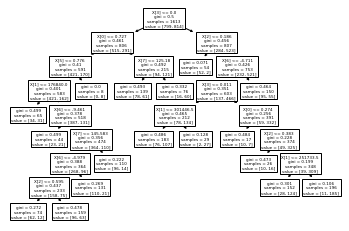

In [18]:
tree.plot_tree(classifier)